In [1]:
import cx_Oracle, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM CUSTOM15')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='CUSTOM15'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
df15 = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [ ]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM CUSTOM14')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='CUSTOM14'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
df14 = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [ ]:
display(df14.head(), df15.head())

In [ ]:
# 14년도와 15년도 분기별 건수와 금액을 만들어 보자
a14 = pd.DataFrame(df14.drop('고객번호',axis=1).sum())
a15 = pd.DataFrame(df15.drop('고객번호',axis=1).sum())
display(a14, a15)

In [80]:
import matplotlib.font_manager as fm
print([(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name])
plt.rc('font', family='NanumBarunGothic') # For Windows

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumFontSetup_TTF_BARUNGOTHIC\\NanumBarunGothicBold.ttf'), ('NanumBarunGothic', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf'), ('NanumBarunGothic', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicLight.ttf'), ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumFontSetup_TTF_BARUNGOTHIC\\NanumBarunGothicLight.ttf'), ('NanumBarunGothic', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'), ('NanumBarunGothic', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicBold.ttf'), ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumFontSetup_TTF_BARUNGOTHIC\\NanumBarunGothicUltraLight.ttf'), ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumFontSetup_TTF_BARUNGOTHIC\\NanumBarunGothic.ttf')]


In [ ]:
plt.rc('font', family='NanumBarunGothic') # For Windows
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
ax1.plot(a14.iloc[[0,2,4,6]], color='mediumseagreen', label='2014')
ax1.plot(a15.iloc[[0,2,4,6]], color='cornflowerblue', label='2015')
ax1.set_title('분기별 구매건수 변화', fontsize=20)
ax1.legend()
ax2.plot(a14.iloc[[1,3,5,7]], color='mediumseagreen', label='2014')
ax2.plot(a15.iloc[[1,3,5,7]], color='cornflowerblue', label='2015')
ax2.set_title('분기별 구매금액 변화', fontsize=20)
ax2.legend()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

a = pd.concat([a14.iloc[[1,3,5,7]], a15.iloc[[1,3,5,7]]], axis=1)
a.columns=['14년도', '15년도']
a['14년도 비율'] = a['14년도'].apply(lambda x:x/a['14년도'].sum())
a['15년도 비율'] = a['15년도'].apply(lambda x:x/a['15년도'].sum())
a['평균비율'] = (a['14년도 비율']+a['15년도 비율'])/2
a['14신장률'] = ''
a['15신장률'] = ''
for i in range(1,4):
    a['14신장률'][i]= (a.iloc[i,0]-a.iloc[i-1,0])/a.iloc[i-1,0]
for i in range(1,4):
    a['15신장률'][i]= (a.iloc[i,1]-a.iloc[i-1,1])/a.iloc[i-1,1]    
a

In [ ]:
a.평균비율.sum()

In [ ]:
df14.iloc[0,:]

In [ ]:
# 2015년 가을 시즌에 무슨 일이 있었는가...
# 건수가 평년과 같았다면 매출이 작년 매출과 비슷하게 가지 않았을 텐데?
# 가을 시즌 매출에서 뭐가 건수가 떨어졌는지 확인해 보기

In [ ]:
df = pd.concat([df14,df15.drop('고객번호',axis=1)],axis=1)
df.head()

In [ ]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM FWPRICE')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='FWPRICE'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
fwprice = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [ ]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM FWPROD')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='FWPROD'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
fwprod = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [ ]:
fwprice.head()

In [ ]:
display(
    len(fwprice[(fwprice['14년 9월']>fwprice['15년 9월'])]),
    len(fwprice[(fwprice['14년 10월']>fwprice['15년 10월'])]),
    len(fwprice[(fwprice['14년 11월']>fwprice['15년 11월'])]),
    len(fwprice[(fwprice['14년 12월']>fwprice['15년 12월'])]))

In [ ]:
display(
    len(fwprod[(fwprod['14년 9월']>fwprod['15년 9월'])]),
    len(fwprod[(fwprod['14년 10월']>fwprod['15년 10월'])]),
    len(fwprod[(fwprod['14년 11월']>fwprod['15년 11월'])]),
    len(fwprod[(fwprod['14년 12월']>fwprod['15년 12월'])]))

In [ ]:
a['십사'] = a['14년도']/a['14년도'].mean()
a['십오'] = a['15년도']/a['15년도'].mean()
a

In [ ]:
# 1,3분기 비수기, 2,4분기 성수기로 잡는다면 각각의 기준치(평균)에서 

In [ ]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM PURDATE')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='PURDATE'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
purdate = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [ ]:
purdate.sort_values(by='DATETIME', ascending=False)
purdate.tail()

In [ ]:
#purdate['date'] = purdate.DATETIME.apply(lambda x:pd.to_datetime(x))
#purdate.sort_values(by='date', ascending=True,inplace=True)
#purdate.set_index('date',inplace=True)
#purdate.sort_index()
#purdate.drop(['구매일자', 'YEAR','MONTH','DAY','DATETIME'], axis=1, inplace=True)
purdate.drop('date', axis=1, inplace=True)
purdate.tail()

In [ ]:
purdate

In [ ]:
purdate.to_pickle('purdate.pkl')

In [ ]:
pdt = pd.read_pickle('purdate.pkl')
pdt

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
statsmodels.tsa.month_plot(y['구매금액'],ylabel='구매금액', ax=ax[0]);
statsmodels.tsa.month_plot(y['구매건수'],ylabel='구매건수', ax=ax[1]);

In [7]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM MONTHLY')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='MONTHLY'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
mt = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [8]:
mt

,MONTH,14년 구매건수,15년 구매건수
0,1,406629,460231
1,2,365123,418249
2,3,438207,481183
3,4,441038,484952
4,5,479326,520596
5,6,458670,475026
6,7,480005,513925
7,8,456861,491793
8,9,440294,457212
9,10,471398,465914


In [9]:
mt.set_index('MONTH', inplace=True)

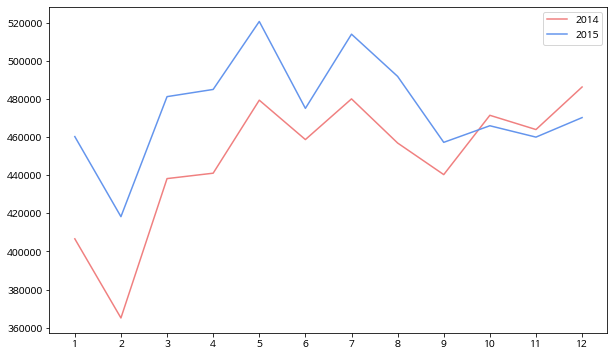

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))
a14 = fig.add_subplot(111)
a14.plot(mt.drop('15년 구매건수',axis=1), color='lightcoral',label='2014')
a14.plot(mt.drop('14년 구매건수',axis=1), color='cornflowerblue',label='2015')
a14.set_xticks(np.linspace(1,12,12))
a14.legend()
plt.show()

In [11]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM CUSTOMER')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='CUSTOMER'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
cust = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [18]:
#cust.to_pickle('분기별고객.pkl')
cust

,고객번호,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기
0,00001,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
1,00002,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
2,00003,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0
3,00004,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0
4,00005,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0
...,...,...,...,...,...,...,...,...,...
19378,19379,NaN,NaN,130300.0,1060320.0,1131020.0,1264900.0,805550.0,1387190.0
19379,19380,NaN,NaN,NaN,522700.0,486830.0,351120.0,368907.0,2183420.0
19380,19381,NaN,NaN,NaN,NaN,1124750.0,1672421.0,1867501.0,1375997.0
19381,19382,NaN,NaN,NaN,NaN,786399.0,1040340.0,1266187.0,1308847.0


In [19]:
regular = cust.dropna()

In [20]:
regular = regular.set_index('고객번호')
regular = regular.astype('int64')
regular

,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기
고객번호,,,,,,,,
00001,9141590,10783765,10781550,23334762,9302985,8595380,7806580,5295938
00002,14123470,10199760,14841180,7080920,18481480,9310130,13842600,12001220
00003,302782,548433,648188,394366,279310,312970,421017,258101
00004,1309643,3732463,2434410,1823100,1737292,1919645,2127112,1610145
00006,2166006,3115284,3163273,2950816,3619234,2769821,3518094,3203889
...,...,...,...,...,...,...,...,...
19333,613130,913988,578210,455450,850690,553590,252010,520430
19334,834049,2705917,2575628,2819868,1699930,767309,484920,465910
19335,937734,2783122,2320105,2042511,2199423,2852695,1553645,2011244


In [21]:
regcust = regular.index
regcust

Index(['00001', '00002', '00003', '00004', '00006', '00007', '00008', '00009',
       '00010', '00011',
       ...
       '19328', '19329', '19330', '19331', '19332', '19333', '19334', '19335',
       '19336', '19337'],
      dtype='object', name='고객번호', length=18866)

In [22]:
(regular.describe().T*0.0001).round(2)
# 단위 1만원

,count,mean,std,min,25%,50%,75%,max
14년 1분기,1.89,410.49,994.98,0.30,115.55,194.32,422.39,62482.65
14년 2분기,1.89,423.87,1069.71,0.15,120.54,201.22,441.75,83648.96
14년 3분기,1.89,393.01,855.51,0.10,124.81,201.50,408.49,61158.75
14년 4분기,1.89,505.32,1428.38,0.20,134.36,223.86,519.89,131922.97
15년 1분기,1.89,441.19,905.41,0.20,130.52,212.98,444.78,40114.33
15년 2분기,1.89,442.82,956.68,0.20,132.40,214.38,457.08,64414.95
15년 3분기,1.89,413.11,894.95,0.24,131.96,210.39,414.78,61730.36
15년 4분기,1.89,513.21,1332.43,0.25,124.85,213.02,501.91,88055.02


In [23]:
regular.describe().T['mean']

14년 1분기    4.104932e+06
14년 2분기    4.238735e+06
14년 3분기    3.930073e+06
14년 4분기    5.053228e+06
15년 1분기    4.411875e+06
15년 2분기    4.428151e+06
15년 3분기    4.131062e+06
15년 4분기    5.132090e+06
Name: mean, dtype: float64

In [24]:
regular.head(100).sort_values(by='14년 1분기', ascending=False)

,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기
고객번호,,,,,,,,
00097,149972666,107454112,152340434,96039920,157527159,149845103,97839596,68534916
00068,78603595,55851379,31037416,31513950,42485202,15391593,19596078,28811632
00039,70381190,44015980,6750910,17999540,5752510,29878828,14685210,18249174
00018,41076760,21355512,12067162,880500,1741090,1053230,1466025,968780
00073,28485950,30636870,38019620,25893100,39186010,20294480,25824620,23867460
...,...,...,...,...,...,...,...,...
00071,561515,598066,614773,561802,797832,511519,721969,405158
00075,544721,729601,732050,774474,584426,523780,602800,670510
00063,446640,865810,651800,814130,877960,871770,1039100,604170


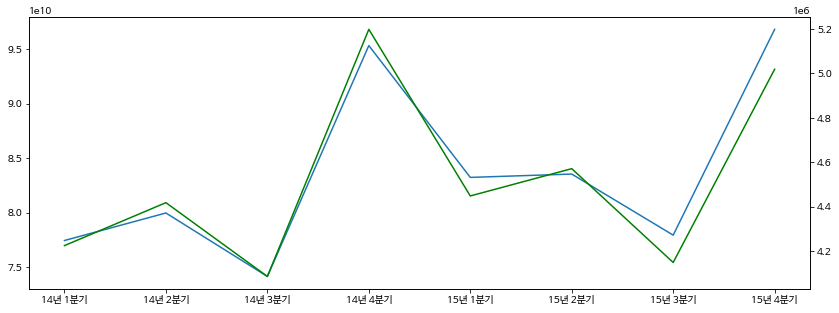

In [25]:
fig, ax1 = plt.subplots(figsize=(14,5))
ax2 = ax1.twinx()
ax1.plot(regular.sum())
#ax2.plot(regular.describe().T['50%'], color='crimson')
ax2.plot(regular.describe().T['75%'], color='green')

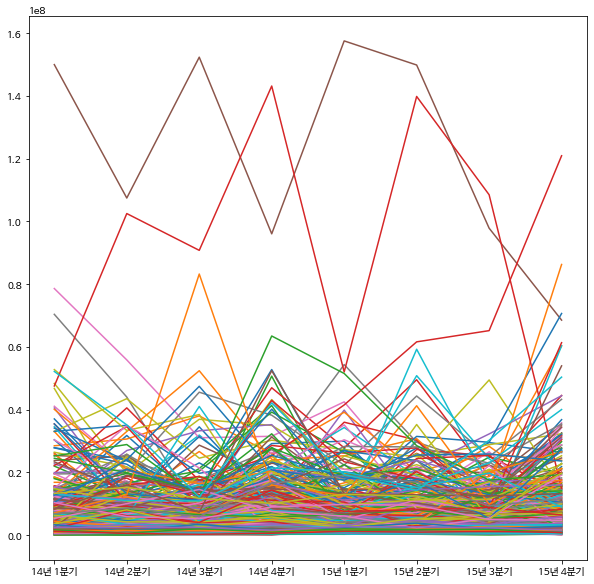

In [123]:
plt.figure(figsize=(10,10))
plt.plot(regular[0:500].T)
plt.show()

In [26]:
c = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cs = c.cursor()
cs.execute('SELECT*FROM PRODUCT')
x = cs.fetchall()
cs.execute("SELECT column_name FROM user_tab_columns WHERE table_name='PRODUCT'")
col = cs.fetchall()
li = []
for i in col:
    for j in i:
        li.append(j)
prod = pd.DataFrame(x, columns = li)
cs.close()
c.commit()
c.close()

In [148]:
#prod.to_pickle('product.pkl')

In [27]:
prod

,상품분류,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기
0,가구,1564238150,1575012572,1588265591,2195040890,1843042310,1914280650,1864128640,2228246290
1,가전제품,3284030480,3363428630,3145891250,3512916110,3367669810,3663626690,3845919305,4826948150
2,공구류,91839430,83342320,90690910,108776520,71873700,63880390,68608890,83906920
3,귀금속,929146910,1479580620,1564230500,1563038290,882977240,1697627010,1650852430,1791873610
4,도서/문구/완구,514560815,470556123,517552452,516961501,483098049,446530295,408723400,503674585
5,명품,6654742230,7039343580,5988397940,9189064310,8185860170,8893693210,7743514880,11086641070
6,생활,2490702860,2776196430,2641451680,2976335875,2603370640,2792302725,2469218253,3037594489
7,시설/서비스,1822300764,1816112441,2070611294,2335830429,2275560695,2135790645,2252514762,2221081544
8,식료품,20326642065,19632303004,21793660292,19124082949,21813883400,19559247141,22825373141,18873045020
9,잡화,1512649396,1332301797,1585243330,1543220810,1708587185,1656823454,1721993947,1586221850


In [30]:
regular['15년 4분기']-regular['14년 4분기']

고객번호
00001   -18038824
00002     4920300
00003     -136265
00004     -212955
00006      253073
           ...   
19333       64980
19334    -2353958
19335      -31267
19336     -937700
19337      342480
Length: 18866, dtype: int64

In [32]:
# 기존고객 중 매출 대목인 4분기에서 매출 감소한 비율을 찾아보자

def check(df):
    if df['15년 4분기']-df['14년 4분기']>=0:
        c=1
    else: c=0
    return c

regular['증감여부'] = ''
regular.증감여부[regular['15년 4분기']-regular['14년 4분기']>=0] = 1
regular.증감여부[regular['15년 4분기']-regular['14년 4분기']<0] = 0
regular

C:\Users\user\AppData\Local\Temp/ipykernel_17608/3403941896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular.증감여부[regular['15년 4분기']-regular['14년 4분기']>=0] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_17608/3403941896.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular.증감여부[regular['15년 4분기']-regular['14년 4분기']<0] = 0


,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기,증감여부
고객번호,,,,,,,,,
00001,9141590,10783765,10781550,23334762,9302985,8595380,7806580,5295938,0
00002,14123470,10199760,14841180,7080920,18481480,9310130,13842600,12001220,1
00003,302782,548433,648188,394366,279310,312970,421017,258101,0
00004,1309643,3732463,2434410,1823100,1737292,1919645,2127112,1610145,0
00006,2166006,3115284,3163273,2950816,3619234,2769821,3518094,3203889,1
...,...,...,...,...,...,...,...,...,...
19333,613130,913988,578210,455450,850690,553590,252010,520430,1
19334,834049,2705917,2575628,2819868,1699930,767309,484920,465910,0
19335,937734,2783122,2320105,2042511,2199423,2852695,1553645,2011244,0


In [35]:
display(regular.증감여부.value_counts(), (9889/18866)*100)

0    9889
1    8977
Name: 증감여부, dtype: int64

52.417046538746945

In [42]:
regular[['14년 4분기','15년 4분기','증감여부']][regular.증감여부==0].sum()

14년 4분기    60073296080
15년 4분기    33398817027
증감여부                 0
dtype: object

In [71]:
r4 = regular[['14년 4분기','15년 4분기']]
r4['증감여부'] = ''
r4.증감여부[r4['15년 4분기']-r4['14년 4분기']>=0]=1
r4.증감여부[r4['15년 4분기']-r4['14년 4분기']<0]=0
r4[r4.증감여부==0].sum()

C:\Users\user\AppData\Local\Temp/ipykernel_17608/3698488725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r4['증감여부'] = ''
C:\Users\user\AppData\Local\Temp/ipykernel_17608/3698488725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r4.증감여부[r4['15년 4분기']-r4['14년 4분기']>=0]=1
C:\Users\user\AppData\Local\Temp/ipykernel_17608/3698488725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

14년 4분기    60073296080
15년 4분기    33398817027
증감여부                 0
dtype: object

In [52]:
pr = prod.set_index('상품분류').T
pr.sum().sort_values(ascending=False)

상품분류
패션/의류        276774626836
식료품          163948237012
명품            64781257390
화장/세정/세면      48837885343
가전제품          29010430425
생활            21787172952
시설/서비스        16929802574
가구            14772255093
잡화            12647041769
귀금속           11559326610
취미/스포츠/레저     11446544637
도서/문구/완구       3861657220
공구류             662919080
dtype: int64

In [57]:
r1 = regular[['14년 1분기','15년 1분기']]
r1['증감여부'] = ''
r1.증감여부[regular['15년 1분기']-regular['14년 1분기']>=0]=1
r1.증감여부[regular['15년 1분기']-regular['14년 1분기']<0]=0
print()
r1[r1.증감여부==0].sum()

-0.418239312999523


C:\Users\user\AppData\Local\Temp/ipykernel_17608/938259156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['증감여부'] = ''
C:\Users\user\AppData\Local\Temp/ipykernel_17608/938259156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1.증감여부[regular['15년 1분기']-regular['14년 1분기']>=0]=1
C:\Users\user\AppData\Local\Temp/ipykernel_17608/938259156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

14년 1분기    46985286969
15년 1분기    27334192826
증감여부                 0
dtype: object

In [74]:
a1 = r1[r1.증감여부==1].sum()
(a1[1]/a1[0]).round(2)

1.84

In [75]:
a2 = r2[r2.증감여부==1].sum()
(a2[1]/a2[0]).round(2)

1.76

In [76]:
a3 = r3[r3.증감여부==1].sum()
(a3[1]/a3[0]).round(2)

1.81

In [77]:
a4 = r4[r4.증감여부==1].sum()
(a4[1]/a4[0]).round(2)

1.8

In [58]:
r2 = regular[['14년 2분기','15년 2분기']]
r2['증감여부'] = ''
r2.증감여부[r2['15년 2분기']-r2['14년 2분기']>=0]=1
r2.증감여부[r2['15년 2분기']-r2['14년 2분기']<0]=0
r2[r2.증감여부==0].sum()

C:\Users\user\AppData\Local\Temp/ipykernel_17608/1315096329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2['증감여부'] = ''
C:\Users\user\AppData\Local\Temp/ipykernel_17608/1315096329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2.증감여부[r2['15년 2분기']-r2['14년 2분기']>=0]=1
C:\Users\user\AppData\Local\Temp/ipykernel_17608/1315096329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

14년 2분기    48093220784
15년 2분기    27313296929
증감여부                 0
dtype: object

In [60]:
r3 = regular[['14년 3분기','15년 3분기']]
r3['증감여부'] = ''
r3.증감여부[r3['15년 3분기']-r3['14년 3분기']>=0]=1
r3.증감여부[r3['15년 3분기']-r3['14년 3분기']<0]=0
r3[r3.증감여부==0].sum()

C:\Users\user\AppData\Local\Temp/ipykernel_17608/1319170163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r3['증감여부'] = ''
C:\Users\user\AppData\Local\Temp/ipykernel_17608/1319170163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r3.증감여부[r3['15년 3분기']-r3['14년 3분기']>=0]=1
C:\Users\user\AppData\Local\Temp/ipykernel_17608/1319170163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

14년 3분기    45540614301
15년 3분기    26067858849
증감여부                 0
dtype: object

In [73]:
display(r1.증감여부.value_counts(),
        r2.증감여부.value_counts(),
        r3.증감여부.value_counts(),
        r4.증감여부.value_counts())

1    10609
0     8257
Name: 증감여부, dtype: int64

1    10558
0     8308
Name: 증감여부, dtype: int64

1    10143
0     8723
Name: 증감여부, dtype: int64

0    9889
1    8977
Name: 증감여부, dtype: int64